# Feature Usage Distribution Analysis

This notebook analyzes the distribution of feature usage rates across different response types (prompt only, prompt + chosen, prompt + rejected). Since both alignment and formatting results share the same dataset, we'll create 3 plots showing how usage percentage decreases from most used to least used features.

## Overview:
- **Data Source**: Feature usage files from comprehensive steering analysis
- **Analysis Types**: Prompt only, Prompt + Chosen, Prompt + Rejected
- **Visualization**: Distribution plots showing usage percentage decline with sophisticated styling
- **Output**: Publication-quality plots with enhanced aesthetics

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from datetime import datetime
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set up sophisticated plotting style
plt.style.use('default')
sns.set_palette("husl")

# Enhanced matplotlib settings for publication-quality plots
plt.rcParams.update({
    'figure.figsize': (12, 8),
    'font.size': 12,
    'font.family': 'sans-serif',
    'text.usetex': False,
    'axes.linewidth': 1.2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linewidth': 1.0,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'legend.frameon': False,
    'legend.fontsize': 11,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.1
})

# Define a sophisticated color palette
colors = {
    'primary': '#2E86AB',      # Deep blue
    'secondary': '#A23B72',    # Deep magenta  
    'accent': '#F18F01',       # Orange
    'success': '#C73E1D',      # Deep red
    'neutral': '#6C757D',      # Gray
    'light': '#E9ECEF',        # Light gray
    'related': '#2E8B57',      # Sea green for related features
    'not_related': '#4682B4'   # Steel blue for not-related features
}

print("Enhanced plotting environment initialized!")
print(f"Color palette: {list(colors.keys())}")

Enhanced plotting environment initialized!
Color palette: ['primary', 'secondary', 'accent', 'success', 'neutral', 'light', 'related', 'not_related']


## Data Loading Functions

In [2]:
def load_feature_usage_data(usage_file_path):
    """
    Load feature usage data from JSON file.
    
    Args:
        usage_file_path: Path to the feature usage JSON file
    
    Returns:
        Dictionary with summary info and feature usage details
    """
    try:
        with open(usage_file_path, 'r') as f:
            data = json.load(f)
        
        # Convert feature usage details to DataFrame for easier manipulation
        usage_df = pd.DataFrame(data['feature_usage_details'])
        
        # Add rank column (1-indexed, since data is already sorted by usage_count descending)
        usage_df['rank'] = range(1, len(usage_df) + 1)
        
        return {
            'summary': data['summary'],
            'usage_df': usage_df,
            'file_path': usage_file_path
        }
    except Exception as e:
        print(f"Error loading {usage_file_path}: {e}")
        return None

def get_response_type_from_filename(filename):
    """
    Extract response type from filename.
    
    Args:
        filename: Name of the feature usage file
    
    Returns:
        String indicating response type
    """
    if 'prompt_only' in filename:
        return 'prompt_only'
    elif 'prompt_chosen' in filename:
        return 'prompt_chosen'
    elif 'prompt_rejected' in filename:
        return 'prompt_rejected'
    else:
        return 'unknown'

def format_response_label(response_type):
    """
    Format response type for display.
    
    Args:
        response_type: Raw response type string
    
    Returns:
        Formatted label for display
    """
    if response_type == 'prompt_only':
        return 'Prompt Only'
    elif response_type == 'prompt_chosen':
        return 'Prompt + Chosen'
    elif response_type == 'prompt_rejected':
        return 'Prompt + Rejected'
    else:
        return response_type.replace('_', ' ').title()

print("Data loading functions defined!")

Data loading functions defined!


## Data Collection from Feature Usage Files

In [3]:
# Define paths to feature usage files
analysis_dir = Path('../outputs/feature_classification/comprehensive_analysis')
print(f"Looking for feature usage files in: {analysis_dir.absolute()}")

# Find all feature usage files - we'll use alignment files since both alignment/formatting share the same dataset
feature_usage_files = [
    analysis_dir / "alignment_steering_analysis_prompt_only_ignore_mask_adapter_feature_usage.json",
    analysis_dir / "alignment_steering_analysis_prompt_chosen_ignore_mask_adapter_feature_usage.json",
    analysis_dir / "alignment_steering_analysis_prompt_rejected_ignore_mask_adapter_feature_usage.json"
]

print(f"Target feature usage files:")
for f in feature_usage_files:
    exists = "✅" if f.exists() else "❌"
    print(f"  {exists} {f.name}")

# Load data from all files
usage_data = {}
for usage_file in feature_usage_files:
    if usage_file.exists():
        response_type = get_response_type_from_filename(usage_file.name)
        data = load_feature_usage_data(usage_file)
        if data:
            usage_data[response_type] = data
            print(f"Loaded data for {response_type}: {len(data['usage_df'])} features")
        else:
            print(f"Failed to load data from {usage_file.name}")
    else:
        print(f"File not found: {usage_file.name}")

if not usage_data:
    print("\n⚠️  No feature usage data found! Make sure to run the comprehensive steering analysis first.")
    print("   Run: python src/fsrl/scripts/alignment_steering_analysis.py --run_all_experiments")
else:
    print(f"\n✅ Successfully loaded feature usage data for {len(usage_data)} response types!")
    
    # Display summary statistics
    for response_type, data in usage_data.items():
        summary = data['summary']
        print(f"\n{format_response_label(response_type)}:")
        print(f"  - Total features: {summary['total_features']:,}")
        print(f"  - Active features: {summary['active_features']:,}")
        print(f"  - Total usage events: {summary['total_usage_events']:,}")
        print(f"  - Mean usage per active feature: {summary['mean_usage_per_active_feature']:.1f}")
        print(f"  - Top 10 features usage %: {summary['top_10_features_usage_percentage']*100:.1f}%")

Looking for feature usage files in: /lambda/nfs/fsrl/feature-steering-RL/notebooks/../outputs/feature_classification/comprehensive_analysis
Target feature usage files:
  ✅ alignment_steering_analysis_prompt_only_ignore_mask_adapter_feature_usage.json
  ✅ alignment_steering_analysis_prompt_chosen_ignore_mask_adapter_feature_usage.json
  ✅ alignment_steering_analysis_prompt_rejected_ignore_mask_adapter_feature_usage.json
Loaded data for prompt_only: 65536 features
Loaded data for prompt_chosen: 65536 features
Loaded data for prompt_rejected: 65536 features

✅ Successfully loaded feature usage data for 3 response types!

Prompt Only:
  - Total features: 65,536
  - Active features: 6,688
  - Total usage events: 89,806,042
  - Mean usage per active feature: 13427.9
  - Top 10 features usage %: 400.0%

Prompt + Chosen:
  - Total features: 65,536
  - Active features: 10,801
  - Total usage events: 160,385,421
  - Mean usage per active feature: 14849.1
  - Top 10 features usage %: 691.8%

Prom

## Advanced Plotting Functions

In [4]:
def create_feature_distribution_plot(usage_df, title, response_type, show_classification_colors=True):
    """
    Create a sophisticated distribution plot showing feature usage decline.
    
    Args:
        usage_df: DataFrame with feature usage data
        title: Plot title
        response_type: Type of response for color selection
        show_classification_colors: Whether to color points by classification
    
    Returns:
        matplotlib figure
    """
    # Create figure with enhanced styling
    fig, ax = plt.subplots(figsize=(14, 8))
    fig.patch.set_facecolor('white')
    
    # Prepare data - filter out features with 0% usage for cleaner log plots
    # Only include features that were actually used (usage > 0)
    active_features = usage_df[usage_df['usage_percentage'] > 0].copy()
    active_features['rank'] = range(1, len(active_features) + 1)  # Re-rank the active features
    
    # Convert rank to proportion (0 to 100%) for better x-axis readability
    x_data = (active_features['rank'] / len(active_features)) * 100  # Percentage of features
    y_data = active_features['usage_percentage']  # Already in percentage form from JSON
    
    if show_classification_colors and 'classification' in active_features.columns:
        # Create colors based on classification
        point_colors = []
        for classification in active_features['classification']:
            if classification == 'related':
                point_colors.append(colors['related'])
            elif classification == 'not-related':
                point_colors.append(colors['not_related'])
            elif classification == 'unknown':
                point_colors.append(colors['neutral'])
            else:
                point_colors.append(colors['neutral'])
        
        # Create line plot with classification colors for better continuity
        ax.plot(x_data, y_data, color=colors['primary'], alpha=0.8, linewidth=1.5, rasterized=True)
        
        # Add scatter points on top for classification colors
        scatter = ax.scatter(x_data, y_data, c=point_colors, alpha=0.7, s=0.8, rasterized=True)
        
        # Create custom legend
        related_patch = mpatches.Patch(color=colors['related'], label='Related Features')
        not_related_patch = mpatches.Patch(color=colors['not_related'], label='Not Related Features')
        unknown_patch = mpatches.Patch(color=colors['neutral'], label='Unknown Features')
        ax.legend(handles=[related_patch, not_related_patch, unknown_patch], 
                 loc='upper right', fontsize=10, framealpha=0.9)
    else:
        # Single color line plot for continuity
        color_key = 'primary' if 'prompt_only' in response_type else ('secondary' if 'chosen' in response_type else 'accent')
        ax.plot(x_data, y_data, color=colors[color_key], alpha=0.9, linewidth=1.5, rasterized=True)
    
    # Add trend line for better visualization
    # Use log-linear fit to show the exponential decay nature of the distribution
    # Create a mask for positive values in y
    positive_mask = y_data > 0
    x_trend = x_data[positive_mask]
    log_y = np.log10(y_data[positive_mask])
    
    if len(x_trend) > 10:
        # Fit a line in semi-log space (linear x, log y)
        coeffs = np.polyfit(x_trend, log_y, 1)
        trend_x = np.linspace(0, 100, 1000)  # 0 to 100% for percentile scale
        trend_y = 10**(coeffs[0] * trend_x + coeffs[1])
        
        ax.plot(trend_x, trend_y, '--', color=colors['neutral'], alpha=0.8, linewidth=2,
               label=f'Exponential decay trend')
        ax.legend(loc='upper right', fontsize=10, framealpha=0.9)
    
    # Enhanced axis styling with linear x-axis and log y-axis
    ax.set_yscale('log')
    ax.set_xlabel('Feature Rank Percentile (%)', fontsize=14, fontweight='bold', color=colors['neutral'])
    ax.set_ylabel('Usage Percentage (log scale)', fontsize=14, fontweight='bold', color=colors['neutral'])
    ax.set_title(title, fontsize=16, fontweight='bold', color=colors['neutral'], pad=20)
    
    # Customize grid with enhanced visibility
    ax.grid(True, alpha=0.5, linestyle='-', linewidth=1.0, color=colors['light'])
    ax.set_axisbelow(True)
    
    # Remove top and right spines, enhance bottom and left
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(1.2)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_color(colors['neutral'])
    ax.spines['left'].set_color(colors['neutral'])
    
    # Enhance tick styling
    ax.tick_params(axis='both', which='major', labelsize=11, 
                   colors=colors['neutral'], width=1.2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=9, 
                   colors=colors['neutral'], width=1.0, length=4)
    
    # Add subtle background
    ax.set_facecolor('#FAFAFA')
    
    # Add statistical annotation
    total_features = len(usage_df)  # Total features in original data
    active_feature_count = len(active_features)  # Features actually used
    top_1_percent = int(0.01 * active_feature_count)
    top_1_percent_usage = active_features.head(top_1_percent)['usage_percentage'].sum()
    
    stats_text = (f'Total Features: {total_features:,} ({active_feature_count:,} active)\n'
                 f'Top 1% Features: {top_1_percent_usage:.1f}% of total usage\n'
                 f'Max Usage: {y_data.max():.3f}%')
    
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    return fig

def create_combined_distribution_plot(usage_data_dict):
    """
    Create a combined plot showing all three response types.
    
    Args:
        usage_data_dict: Dictionary with usage data for different response types
    
    Returns:
        matplotlib figure
    """
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.patch.set_facecolor('#FAFAFA')
    
    response_types = ['prompt_only', 'prompt_chosen', 'prompt_rejected']
    plot_colors = [colors['primary'], colors['secondary'], colors['accent']]
    
    for i, (response_type, plot_color) in enumerate(zip(response_types, plot_colors)):
        if response_type in usage_data_dict:
            usage_df = usage_data_dict[response_type]['usage_df']
            ax = axes[i]
            
            # Filter out features with 0% usage for cleaner log plots
            active_features = usage_df[usage_df['usage_percentage'] > 0].copy()
            active_features['rank'] = range(1, len(active_features) + 1)  # Re-rank the active features
            
            # Convert rank to percentage for better x-axis readability
            x_data = (active_features['rank'] / len(active_features)) * 100  # Percentage of features
            y_data = active_features['usage_percentage']  # Already in percentage form
            
            ax.plot(x_data, y_data, color=plot_color, alpha=0.9, linewidth=1.5, rasterized=True)
            
            # Add trend line
            # Create a mask for positive values in y
            positive_mask = y_data > 0
            x_trend = x_data[positive_mask]
            log_y = np.log10(y_data[positive_mask])
            
            if len(x_trend) > 10:
                coeffs = np.polyfit(x_trend, log_y, 1)
                trend_x = np.linspace(0, 100, 1000)  # 0 to 100% for percentile scale
                trend_y = 10**(coeffs[0] * trend_x + coeffs[1])
                ax.plot(trend_x, trend_y, '--', color=colors['neutral'], alpha=0.8, linewidth=2)
            
            # Styling
            ax.set_yscale('log')
            ax.set_xlabel('Feature Rank Percentile (%)', fontsize=12, fontweight='bold')
            if i == 0:
                ax.set_ylabel('Usage Percentage (log scale)', fontsize=12, fontweight='bold')
            ax.set_title(format_response_label(response_type), fontsize=14, fontweight='bold', pad=15)
            
            # Grid and spines
            ax.grid(True, alpha=0.5, linestyle='-', linewidth=1.0)
            ax.set_axisbelow(True)
            ax.set_facecolor('#FAFAFA')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_linewidth(1.2)
            ax.spines['left'].set_linewidth(1.2)
            
            # Tick styling
            ax.tick_params(axis='both', which='major', labelsize=10, width=1.2, length=6)
            ax.tick_params(axis='both', which='minor', labelsize=8, width=1.0, length=4)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Add space at top for main title
    return fig

print("Advanced plotting functions defined!")

Advanced plotting functions defined!


## Individual Distribution Plots

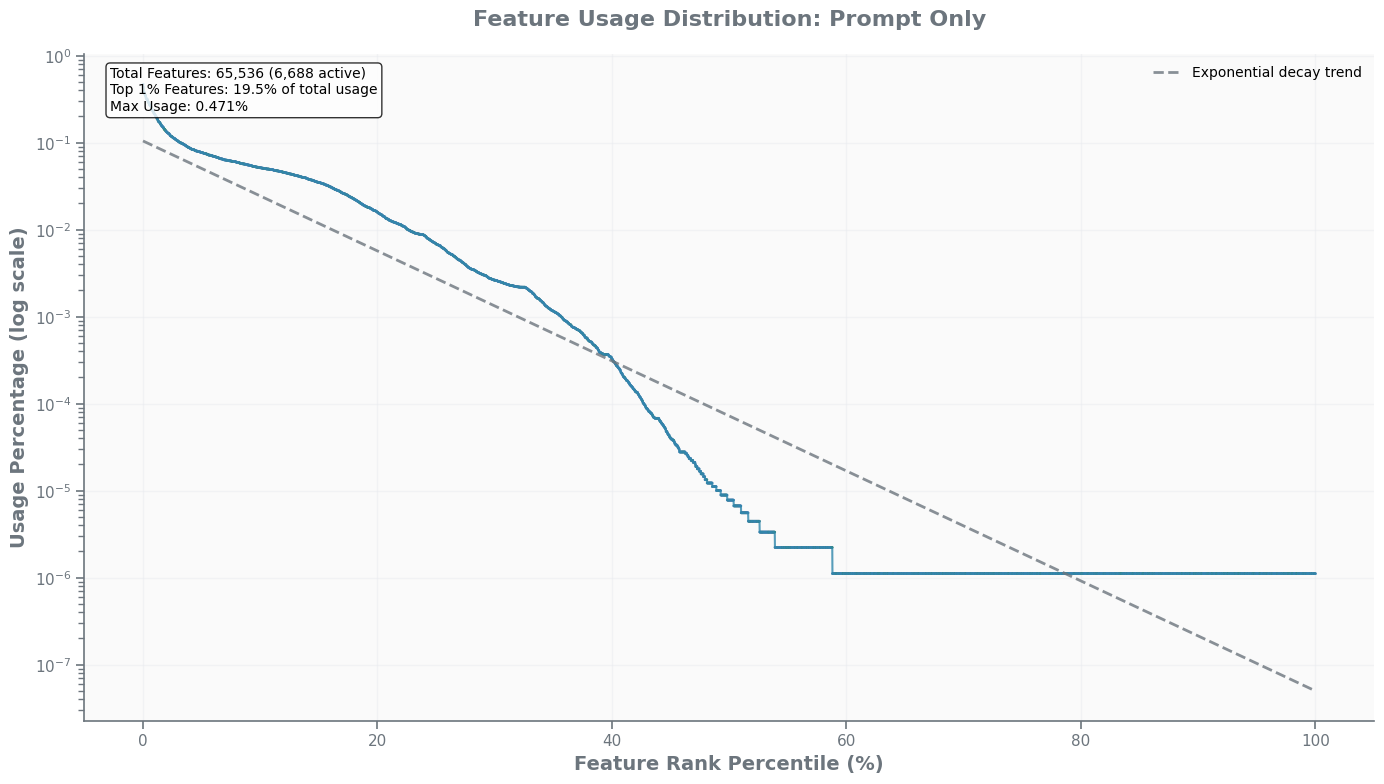


Prompt Only Statistics:
Total features: 65,536
Usage range: 0.000000% - 0.471%
Top 10 features account for: 4.0% of total usage
Top 100 features account for: 25.8% of total usage

Top 1000 features classification breakdown:
  not-related: 839 (83.9%)
  related: 146 (14.6%)
  unknown: 15 (1.5%)


In [5]:
# Plot 1: Prompt Only Distribution
if 'prompt_only' in usage_data:
    fig1 = create_feature_distribution_plot(
        usage_data['prompt_only']['usage_df'],
        'Feature Usage Distribution: Prompt Only',
        'prompt_only',
        show_classification_colors=True
    )
    plt.show()
    
    # Print statistics
    usage_df = usage_data['prompt_only']['usage_df']
    print(f"\nPrompt Only Statistics:")
    print(f"Total features: {len(usage_df):,}")
    print(f"Usage range: {usage_df['usage_percentage'].min():.6f}% - {usage_df['usage_percentage'].max():.3f}%")
    print(f"Top 10 features account for: {usage_df.head(10)['usage_percentage'].sum():.1f}% of total usage")
    print(f"Top 100 features account for: {usage_df.head(100)['usage_percentage'].sum():.1f}% of total usage")
    
    # Classification breakdown in top features
    top_1000 = usage_df.head(1000)
    classification_counts = top_1000['classification'].value_counts()
    print(f"\nTop 1000 features classification breakdown:")
    for classification, count in classification_counts.items():
        percentage = (count / len(top_1000)) * 100
        print(f"  {classification}: {count} ({percentage:.1f}%)")
else:
    print("⚠️  Prompt only data not available")

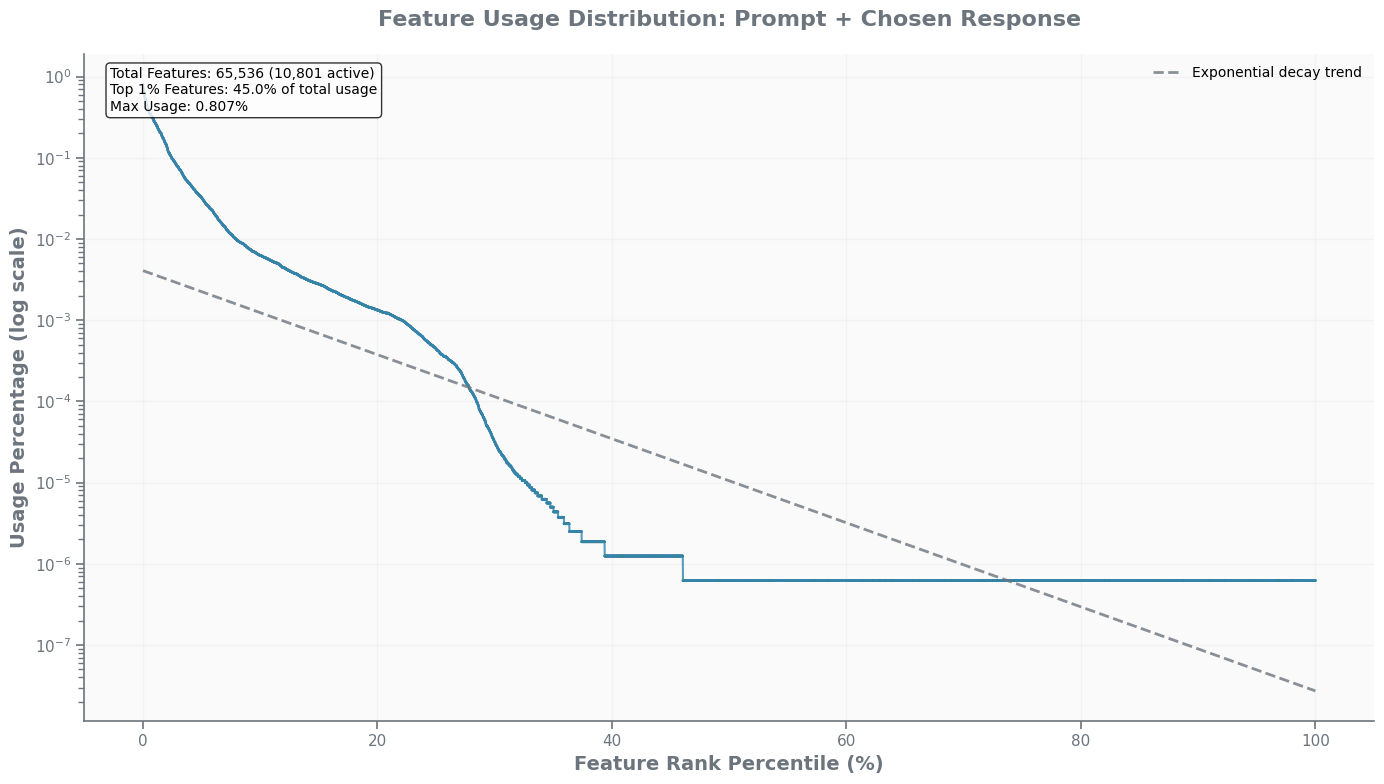


Prompt + Chosen Statistics:
Total features: 65,536
Usage range: 0.000000% - 0.807%
Top 10 features account for: 6.9% of total usage
Top 100 features account for: 42.8% of total usage

Top 1000 features classification breakdown:
  not-related: 855 (85.5%)
  related: 127 (12.7%)
  unknown: 18 (1.8%)


In [6]:
# Plot 2: Prompt + Chosen Distribution
if 'prompt_chosen' in usage_data:
    fig2 = create_feature_distribution_plot(
        usage_data['prompt_chosen']['usage_df'],
        'Feature Usage Distribution: Prompt + Chosen Response',
        'prompt_chosen',
        show_classification_colors=True
    )
    plt.show()
    
    # Print statistics
    usage_df = usage_data['prompt_chosen']['usage_df']
    print(f"\nPrompt + Chosen Statistics:")
    print(f"Total features: {len(usage_df):,}")
    print(f"Usage range: {usage_df['usage_percentage'].min():.6f}% - {usage_df['usage_percentage'].max():.3f}%")
    print(f"Top 10 features account for: {usage_df.head(10)['usage_percentage'].sum():.1f}% of total usage")
    print(f"Top 100 features account for: {usage_df.head(100)['usage_percentage'].sum():.1f}% of total usage")
    
    # Classification breakdown in top features
    top_1000 = usage_df.head(1000)
    classification_counts = top_1000['classification'].value_counts()
    print(f"\nTop 1000 features classification breakdown:")
    for classification, count in classification_counts.items():
        percentage = (count / len(top_1000)) * 100
        print(f"  {classification}: {count} ({percentage:.1f}%)")
else:
    print("⚠️  Prompt + chosen data not available")

In [7]:
# Debug: Check the actual minimum values to see why plots are still discontinuous
if 'prompt_chosen' in usage_data:
    usage_df = usage_data['prompt_chosen']['usage_df']
    
    # Filter to only active features (usage > 0)
    active_features = usage_df[usage_df['usage_percentage'] > 0].copy()
    
    print("Active features analysis:")
    print(f"Total features: {len(usage_df)}")
    print(f"Active features: {len(active_features)}")
    print(f"Zero features: {len(usage_df) - len(active_features)}")
    
    # Look at the smallest active values
    print("\nSmallest ACTIVE usage percentages:")
    smallest_active = active_features.tail(20)['usage_percentage'].values
    print(smallest_active)
    
    # Check for extremely small values that might cause log issues
    very_small = (active_features['usage_percentage'] < 1e-8).sum()
    print(f"\nActive features with < 10^-8 usage: {very_small}")
    
    extremely_small = (active_features['usage_percentage'] < 1e-10).sum()
    print(f"Active features with < 10^-10 usage: {extremely_small}")
    
    # Check the log values of smallest features
    print(f"\nLog10 of smallest values:")
    print(np.log10(smallest_active))
    
    # This might be causing matplotlib to have precision issues
    print(f"Minimum log10 value: {np.log10(active_features['usage_percentage'].min())}")

Active features analysis:
Total features: 65536
Active features: 10801
Zero features: 54735

Smallest ACTIVE usage percentages:
[6.23498067e-07 6.23498067e-07 6.23498067e-07 6.23498067e-07
 6.23498067e-07 6.23498067e-07 6.23498067e-07 6.23498067e-07
 6.23498067e-07 6.23498067e-07 6.23498067e-07 6.23498067e-07
 6.23498067e-07 6.23498067e-07 6.23498067e-07 6.23498067e-07
 6.23498067e-07 6.23498067e-07 6.23498067e-07 6.23498067e-07]

Active features with < 10^-8 usage: 0
Active features with < 10^-10 usage: 0

Log10 of smallest values:
[-6.20516489 -6.20516489 -6.20516489 -6.20516489 -6.20516489 -6.20516489
 -6.20516489 -6.20516489 -6.20516489 -6.20516489 -6.20516489 -6.20516489
 -6.20516489 -6.20516489 -6.20516489 -6.20516489 -6.20516489 -6.20516489
 -6.20516489 -6.20516489]
Minimum log10 value: -6.205164888468016


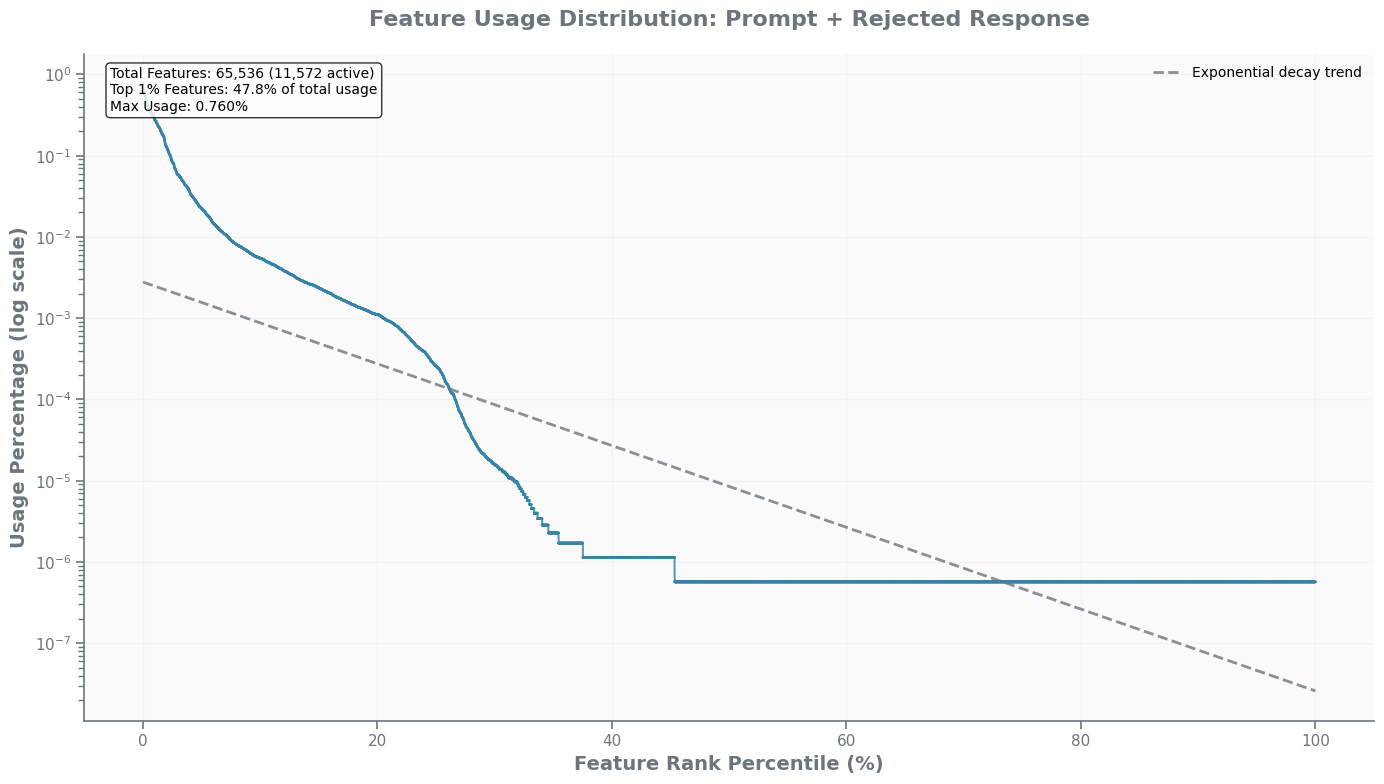


Prompt + Rejected Statistics:
Total features: 65,536
Usage range: 0.000000% - 0.760%
Top 10 features account for: 6.7% of total usage
Top 100 features account for: 43.4% of total usage

Top 1000 features classification breakdown:
  not-related: 859 (85.9%)
  related: 123 (12.3%)
  unknown: 18 (1.8%)


In [8]:
# Plot 3: Prompt + Rejected Distribution
if 'prompt_rejected' in usage_data:
    fig3 = create_feature_distribution_plot(
        usage_data['prompt_rejected']['usage_df'],
        'Feature Usage Distribution: Prompt + Rejected Response',
        'prompt_rejected',
        show_classification_colors=True
    )
    plt.show()
    
    # Print statistics
    usage_df = usage_data['prompt_rejected']['usage_df']
    print(f"\nPrompt + Rejected Statistics:")
    print(f"Total features: {len(usage_df):,}")
    print(f"Usage range: {usage_df['usage_percentage'].min():.6f}% - {usage_df['usage_percentage'].max():.3f}%")
    print(f"Top 10 features account for: {usage_df.head(10)['usage_percentage'].sum():.1f}% of total usage")
    print(f"Top 100 features account for: {usage_df.head(100)['usage_percentage'].sum():.1f}% of total usage")
    
    # Classification breakdown in top features
    top_1000 = usage_df.head(1000)
    classification_counts = top_1000['classification'].value_counts()
    print(f"\nTop 1000 features classification breakdown:")
    for classification, count in classification_counts.items():
        percentage = (count / len(top_1000)) * 100
        print(f"  {classification}: {count} ({percentage:.1f}%)")
else:
    print("⚠️  Prompt + rejected data not available")

## Combined Distribution Plot

## Classification-Based Distribution Analysis

Now we'll create specialized plots that separate features by their classification (related vs not-related) for both alignment and style steering tasks.

In [9]:
def load_classification_data_for_task(task_type='alignment'):
    """
    Load feature usage data for a specific task (alignment or formatting/style).
    
    Args:
        task_type: Either 'alignment' or 'formatting' (style)
    
    Returns:
        Dictionary with usage data for all response types for the given task
    """
    task_name = task_type  # 'alignment' or 'formatting'
    
    feature_usage_files = [
        analysis_dir / f"{task_name}_steering_analysis_prompt_only_ignore_mask_sae_feature_usage.json",
        analysis_dir / f"{task_name}_steering_analysis_prompt_chosen_ignore_mask_sae_feature_usage.json", 
        analysis_dir / f"{task_name}_steering_analysis_prompt_rejected_ignore_mask_sae_feature_usage.json"
    ]
    
    usage_data = {}
    for usage_file in feature_usage_files:
        if usage_file.exists():
            response_type = get_response_type_from_filename(usage_file.name)
            data = load_feature_usage_data(usage_file)
            if data:
                usage_data[response_type] = data
                print(f"Loaded {task_name} data for {response_type}: {len(data['usage_df'])} features")
    
    return usage_data

def create_classification_combined_plot(usage_data_dict, task_name, classification_filter='both'):
    """
    Create a combined plot showing classification-separated distributions.
    
    Args:
        usage_data_dict: Dictionary with usage data for different response types
        task_name: Name of the task (for title)
        classification_filter: 'related', 'not-related', or 'both'
    
    Returns:
        matplotlib figure
    """
    response_types = ['prompt_only', 'prompt_chosen', 'prompt_rejected']
    
    if classification_filter == 'both':
        # Create 2x3 subplot grid: related on top, not-related on bottom
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.patch.set_facecolor('#FAFAFA')
        
        classification_types = ['related', 'not-related']
        classification_colors = [colors['related'], colors['not_related']]
        
        for class_idx, (classification, class_color) in enumerate(zip(classification_types, classification_colors)):
            for resp_idx, response_type in enumerate(response_types):
                if response_type in usage_data_dict:
                    usage_df = usage_data_dict[response_type]['usage_df']
                    ax = axes[class_idx, resp_idx]
                    
                    # Filter by classification
                    if 'classification' in usage_df.columns:
                        filtered_df = usage_df[usage_df['classification'] == classification].copy()
                        
                        if len(filtered_df) > 0:
                            # Filter out features with 0% usage
                            active_features = filtered_df[filtered_df['usage_percentage'] > 0].copy()
                            
                            if len(active_features) > 0:
                                active_features['rank'] = range(1, len(active_features) + 1)
                                
                                # Convert rank to percentage for better x-axis readability
                                x_data = (active_features['rank'] / len(active_features)) * 100
                                y_data = active_features['usage_percentage']
                                
                                ax.plot(x_data, y_data, color=class_color, alpha=0.9, linewidth=1.8, rasterized=True)
                                
                                # Add trend line
                                positive_mask = y_data > 0
                                x_trend = x_data[positive_mask]
                                log_y = np.log10(y_data[positive_mask])
                                
                                if len(x_trend) > 5:
                                    coeffs = np.polyfit(x_trend, log_y, 1)
                                    trend_x = np.linspace(0, 100, 1000)
                                    trend_y = 10**(coeffs[0] * trend_x + coeffs[1])
                                    ax.plot(trend_x, trend_y, '--', color=colors['neutral'], alpha=0.7, linewidth=2)
                            else:
                                ax.text(0.5, 0.5, 'No active features', ha='center', va='center', 
                                       transform=ax.transAxes, fontsize=12, color=colors['neutral'])
                        else:
                            ax.text(0.5, 0.5, 'No features in this classification', ha='center', va='center', 
                                   transform=ax.transAxes, fontsize=12, color=colors['neutral'])
                    
                    # Styling
                    ax.set_yscale('log')
                    ax.set_xlabel('Feature Rank Percentile (%)', fontsize=11, fontweight='bold')
                    if resp_idx == 0:
                        ax.set_ylabel('Usage Percentage (log scale)', fontsize=11, fontweight='bold')
                    
                    # Create subplot title combining response type and classification
                    subtitle = f"{format_response_label(response_type)} - {classification.replace('-', ' ').title()} Features"
                    ax.set_title(subtitle, fontsize=11, fontweight='bold', pad=15)
                    
                    # Grid and spines styling
                    ax.grid(True, alpha=0.5, linestyle='-', linewidth=1.0)
                    ax.set_axisbelow(True)
                    ax.set_facecolor('#FAFAFA')
                    ax.spines['top'].set_visible(False)
                    ax.spines['right'].set_visible(False)
                    ax.spines['bottom'].set_linewidth(1.2)
                    ax.spines['left'].set_linewidth(1.2)
                    
                    # Tick styling
                    ax.tick_params(axis='both', which='major', labelsize=10, width=1.2, length=6)
                    ax.tick_params(axis='both', which='minor', labelsize=8, width=1.0, length=4)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.90, hspace=0.3)  # Add space for main title and between rows
        return fig
        
    else:
        # Single row for one classification
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        fig.patch.set_facecolor('#FAFAFA')
        
        class_color = colors['related'] if classification_filter == 'related' else colors['not_related']
        
        for i, response_type in enumerate(response_types):
            if response_type in usage_data_dict:
                usage_df = usage_data_dict[response_type]['usage_df']
                ax = axes[i]
                
                # Filter by classification
                if 'classification' in usage_df.columns:
                    filtered_df = usage_df[usage_df['classification'] == classification_filter].copy()
                    
                    if len(filtered_df) > 0:
                        # Filter out features with 0% usage
                        active_features = filtered_df[filtered_df['usage_percentage'] > 0].copy()
                        
                        if len(active_features) > 0:
                            active_features['rank'] = range(1, len(active_features) + 1)
                            
                            x_data = (active_features['rank'] / len(active_features)) * 100
                            y_data = active_features['usage_percentage']
                            
                            ax.plot(x_data, y_data, color=class_color, alpha=0.9, linewidth=1.8, rasterized=True)
                            
                            # Add trend line
                            positive_mask = y_data > 0
                            x_trend = x_data[positive_mask]
                            log_y = np.log10(y_data[positive_mask])
                            
                            if len(x_trend) > 5:
                                coeffs = np.polyfit(x_trend, log_y, 1)
                                trend_x = np.linspace(0, 100, 1000)
                                trend_y = 10**(coeffs[0] * trend_x + coeffs[1])
                                ax.plot(trend_x, trend_y, '--', color=colors['neutral'], alpha=0.7, linewidth=2)
                
                # Styling
                ax.set_yscale('log')
                ax.set_xlabel('Feature Rank Percentile (%)', fontsize=12, fontweight='bold')
                if i == 0:
                    ax.set_ylabel('Usage Percentage (log scale)', fontsize=12, fontweight='bold')
                ax.set_title(format_response_label(response_type), fontsize=14, fontweight='bold', pad=15)
                
                # Grid and spines
                ax.grid(True, alpha=0.5, linestyle='-', linewidth=1.0)
                ax.set_axisbelow(True)
                ax.set_facecolor('#FAFAFA')
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                ax.spines['bottom'].set_linewidth(1.2)
                ax.spines['left'].set_linewidth(1.2)
                
                # Tick styling
                ax.tick_params(axis='both', which='major', labelsize=10, width=1.2, length=6)
                ax.tick_params(axis='both', which='minor', labelsize=8, width=1.0, length=4)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        return fig

print("Classification-based plotting functions defined!")

Classification-based plotting functions defined!


In [10]:
# Load alignment data for classification analysis
print("="*80)
print("LOADING ALIGNMENT STEERING DATA FOR CLASSIFICATION ANALYSIS")
print("="*80)

alignment_usage_data = load_classification_data_for_task('alignment')

if alignment_usage_data:
    print(f"✅ Successfully loaded alignment data for {len(alignment_usage_data)} response types!")
    
    # Show classification breakdown for alignment
    for response_type, data in alignment_usage_data.items():
        usage_df = data['usage_df']
        if 'classification' in usage_df.columns:
            print(f"\n{format_response_label(response_type)} - Classification breakdown:")
            classification_counts = usage_df['classification'].value_counts()
            for classification, count in classification_counts.items():
                percentage = (count / len(usage_df)) * 100
                usage_sum = usage_df[usage_df['classification'] == classification]['usage_percentage'].sum()
                print(f"  {classification}: {count:,} features ({percentage:.1f}%) - {usage_sum:.1f}% total usage")
else:
    print("⚠️  No alignment data available for classification analysis")

LOADING ALIGNMENT STEERING DATA FOR CLASSIFICATION ANALYSIS
Loaded alignment data for prompt_only: 65536 features
Loaded alignment data for prompt_chosen: 65536 features
Loaded alignment data for prompt_rejected: 65536 features
✅ Successfully loaded alignment data for 3 response types!

Prompt Only - Classification breakdown:
  not-related: 54,201 features (82.7%) - 80.5% total usage
  related: 11,143 features (17.0%) - 19.5% total usage
  unknown: 192 features (0.3%) - 0.0% total usage

Prompt + Chosen - Classification breakdown:
  not-related: 54,201 features (82.7%) - 78.1% total usage
  related: 11,143 features (17.0%) - 21.9% total usage
  unknown: 192 features (0.3%) - 0.0% total usage

Prompt + Rejected - Classification breakdown:
  not-related: 54,201 features (82.7%) - 78.0% total usage
  related: 11,143 features (17.0%) - 22.0% total usage
  unknown: 192 features (0.3%) - 0.0% total usage



CREATING ALIGNMENT CLASSIFICATION COMBINED PLOT


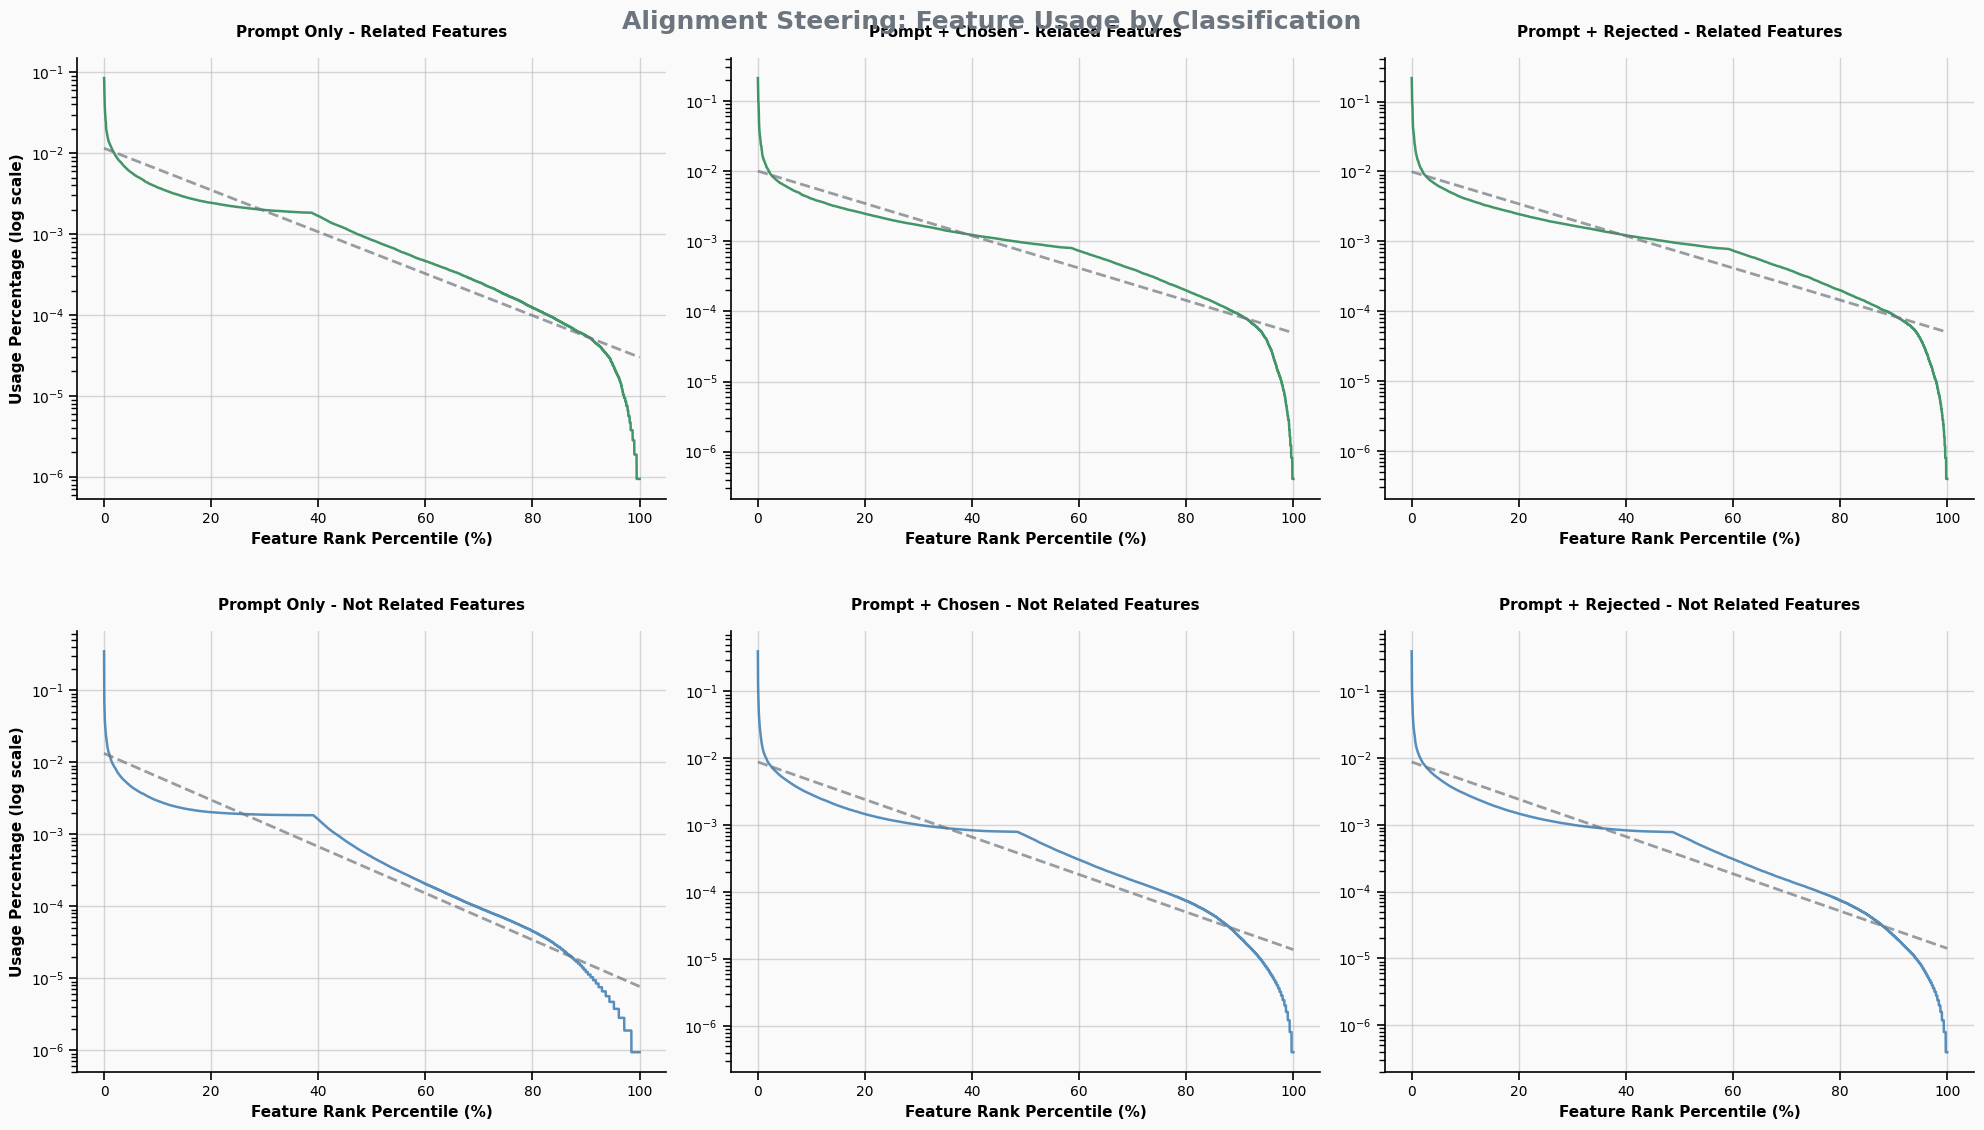

✅ Alignment classification plot created successfully!


In [11]:
# Create Alignment Classification Combined Plot
if alignment_usage_data and len(alignment_usage_data) >= 2:
    print("\n" + "="*60)
    print("CREATING ALIGNMENT CLASSIFICATION COMBINED PLOT")
    print("="*60)
    
    fig_alignment_combined = create_classification_combined_plot(
        alignment_usage_data, 
        task_name='Alignment',
        classification_filter='both'
    )
    
    plt.suptitle('Alignment Steering: Feature Usage by Classification', 
                fontsize=18, fontweight='bold', y=0.94, color=colors['neutral'])
    plt.show()
    
    print("✅ Alignment classification plot created successfully!")
else:
    print("⚠️  Need at least 2 response types for alignment classification analysis")

In [12]:
# Load style/formatting data for classification analysis
print("\n" + "="*80)
print("LOADING STYLE (FORMATTING) STEERING DATA FOR CLASSIFICATION ANALYSIS") 
print("="*80)

style_usage_data = load_classification_data_for_task('formatting')

if style_usage_data:
    print(f"✅ Successfully loaded style data for {len(style_usage_data)} response types!")
    
    # Show classification breakdown for style
    for response_type, data in style_usage_data.items():
        usage_df = data['usage_df']
        if 'classification' in usage_df.columns:
            print(f"\n{format_response_label(response_type)} - Classification breakdown:")
            classification_counts = usage_df['classification'].value_counts()
            for classification, count in classification_counts.items():
                percentage = (count / len(usage_df)) * 100
                usage_sum = usage_df[usage_df['classification'] == classification]['usage_percentage'].sum()
                print(f"  {classification}: {count:,} features ({percentage:.1f}%) - {usage_sum:.1f}% total usage")
else:
    print("⚠️  No style data available for classification analysis")


LOADING STYLE (FORMATTING) STEERING DATA FOR CLASSIFICATION ANALYSIS
Loaded formatting data for prompt_only: 65536 features
Loaded formatting data for prompt_chosen: 65536 features
Loaded formatting data for prompt_rejected: 65536 features
✅ Successfully loaded style data for 3 response types!

Prompt Only - Classification breakdown:
  not-related: 49,953 features (76.2%) - 76.6% total usage
  related: 15,391 features (23.5%) - 23.4% total usage
  unknown: 192 features (0.3%) - 0.0% total usage

Prompt + Chosen - Classification breakdown:
  not-related: 49,953 features (76.2%) - 78.9% total usage
  related: 15,391 features (23.5%) - 21.1% total usage
  unknown: 192 features (0.3%) - 0.0% total usage

Prompt + Rejected - Classification breakdown:
  not-related: 49,953 features (76.2%) - 79.0% total usage
  related: 15,391 features (23.5%) - 21.0% total usage
  unknown: 192 features (0.3%) - 0.0% total usage



CREATING STYLE CLASSIFICATION COMBINED PLOT


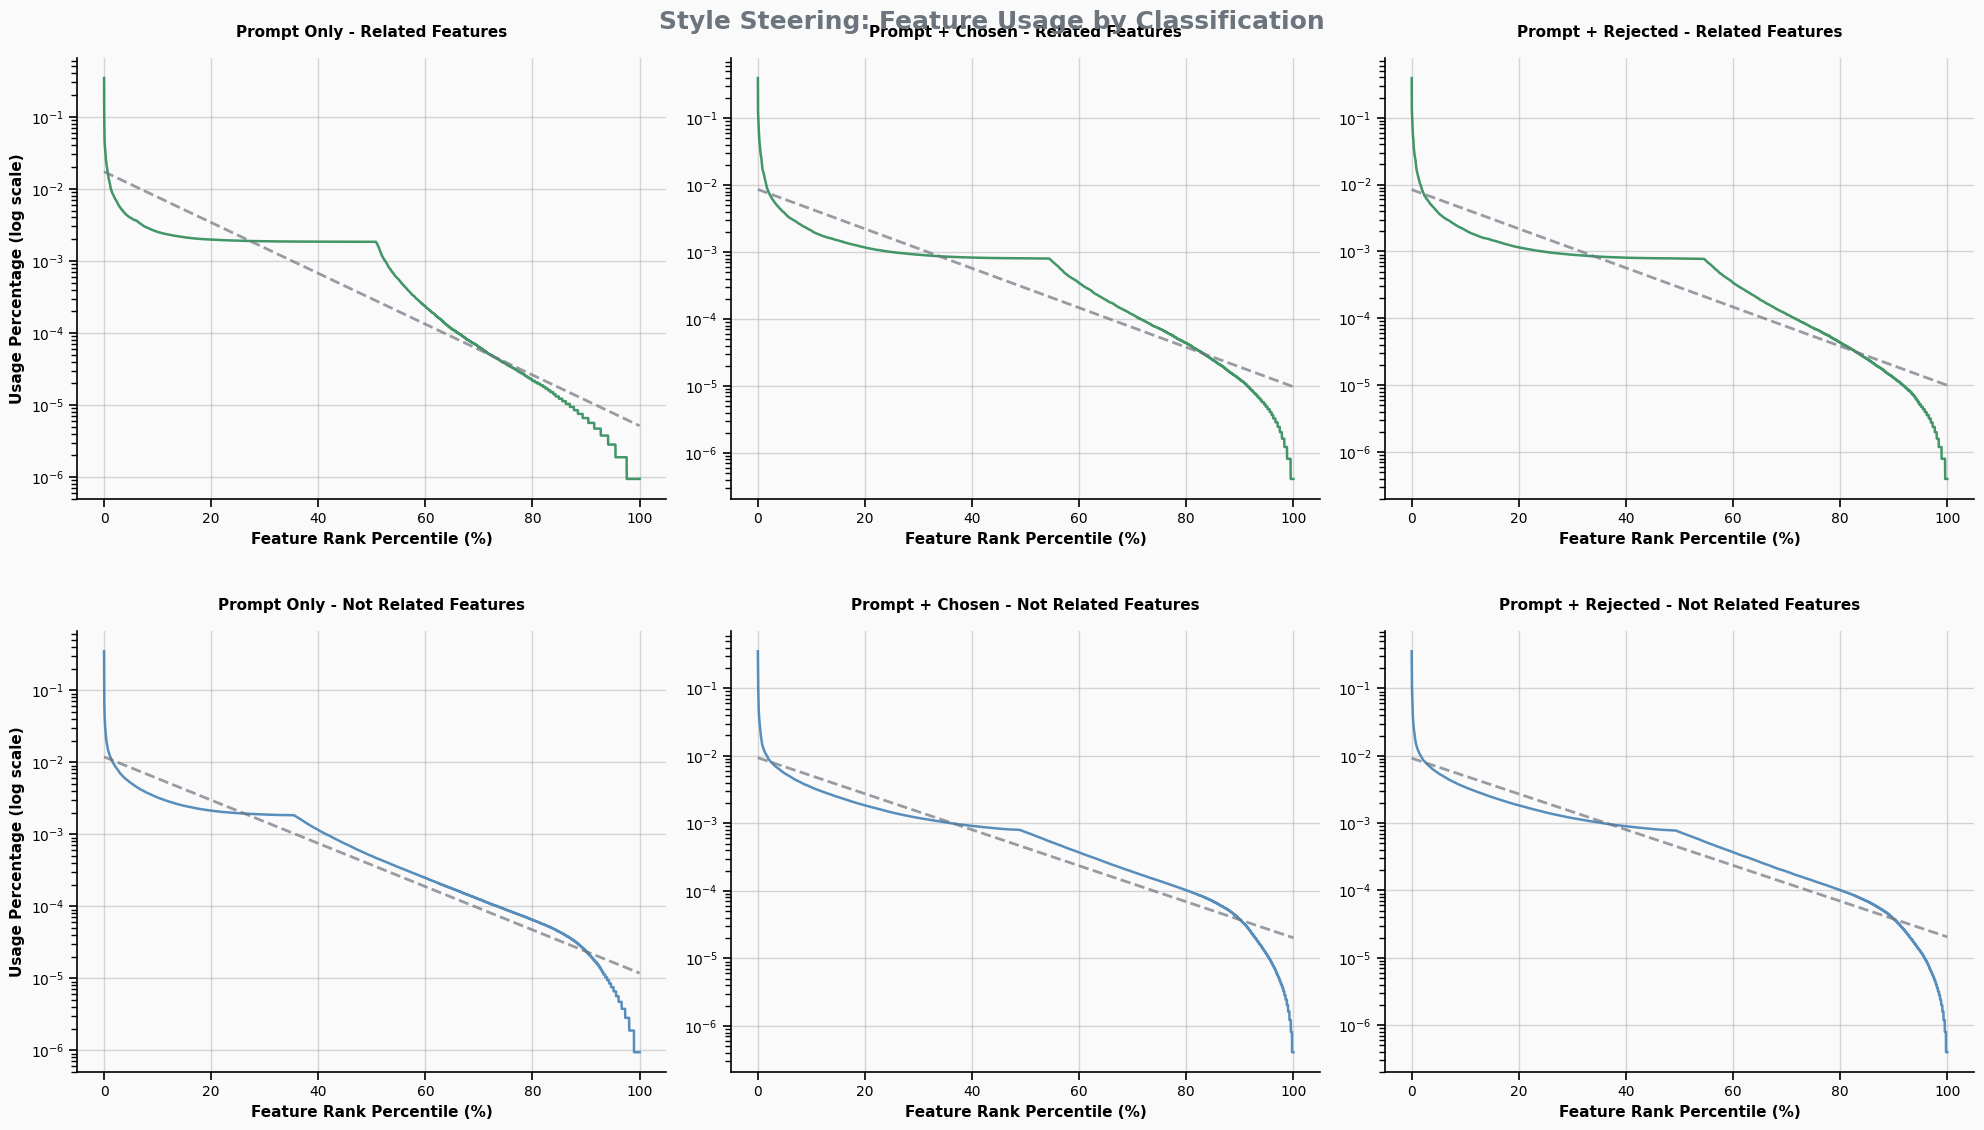

✅ Style classification plot created successfully!


In [13]:
# Create Style Classification Combined Plot
if style_usage_data and len(style_usage_data) >= 2:
    print("\n" + "="*60)
    print("CREATING STYLE CLASSIFICATION COMBINED PLOT")
    print("="*60)
    
    fig_style_combined = create_classification_combined_plot(
        style_usage_data, 
        task_name='Style',
        classification_filter='both'
    )
    
    plt.suptitle('Style Steering: Feature Usage by Classification', 
                fontsize=18, fontweight='bold', y=0.94, color=colors['neutral'])
    plt.show()
    
    print("✅ Style classification plot created successfully!")
else:
    print("⚠️  Need at least 2 response types for style classification analysis")

In [14]:
# DEBUG: Investigate why related and not-related features look the same
if alignment_usage_data and 'prompt_only' in alignment_usage_data:
    usage_df = alignment_usage_data['prompt_only']['usage_df']
    
    print("DEBUG: Data analysis for prompt_only alignment")
    print("="*60)
    
    # Check overall classification distribution
    print("Overall classification counts:")
    print(usage_df['classification'].value_counts())
    
    # Check related features
    related_features = usage_df[usage_df['classification'] == 'related'].copy()
    not_related_features = usage_df[usage_df['classification'] == 'not-related'].copy()
    
    print(f"\nRelated features: {len(related_features)}")
    print(f"Not-related features: {len(not_related_features)}")
    
    # Check usage patterns
    print(f"\nRelated features usage range: {related_features['usage_percentage'].min():.6f}% to {related_features['usage_percentage'].max():.3f}%")
    print(f"Not-related features usage range: {not_related_features['usage_percentage'].min():.6f}% to {not_related_features['usage_percentage'].max():.3f}%")
    
    # Check top features for each classification
    print(f"\nTop 10 related features usage percentages:")
    print(related_features.head(10)['usage_percentage'].values)
    
    print(f"\nTop 10 not-related features usage percentages:")
    print(not_related_features.head(10)['usage_percentage'].values)
    
    # Check if the issue is that we're filtering by rank within each classification
    # instead of preserving the global ranking
    print(f"\nTop 10 overall features and their classifications:")
    top_10_overall = usage_df.head(10)[['feature_index', 'usage_percentage', 'classification']]
    print(top_10_overall)
    
    # Check active features in each classification
    related_active = related_features[related_features['usage_percentage'] > 0]
    not_related_active = not_related_features[not_related_features['usage_percentage'] > 0]
    
    print(f"\nActive related features: {len(related_active)}")
    print(f"Active not-related features: {len(not_related_active)}")
    
    print(f"Related features mean usage: {related_active['usage_percentage'].mean():.6f}%")
    print(f"Not-related features mean usage: {not_related_active['usage_percentage'].mean():.6f}%")

DEBUG: Data analysis for prompt_only alignment
Overall classification counts:
classification
not-related    54201
related        11143
unknown          192
Name: count, dtype: int64

Related features: 11143
Not-related features: 54201

Related features usage range: 0.000000% to 0.085%
Not-related features usage range: 0.000000% to 0.347%

Top 10 related features usage percentages:
[0.08486126 0.08225552 0.08171599 0.07783226 0.07206343 0.05501311
 0.05413108 0.05410856 0.0531693  0.04954548]

Top 10 not-related features usage percentages:
[0.34698447 0.34504401 0.30698739 0.298869   0.27954417 0.24064306
 0.20763651 0.18085762 0.1791358  0.16148682]

Top 10 overall features and their classifications:
   feature_index  usage_percentage classification
0          63865          0.346984    not-related
1          19660          0.345044    not-related
2          12541          0.306987    not-related
3          33764          0.298869    not-related
4          65119          0.279544    no

In [15]:
def create_classification_combined_plot_fixed(usage_data_dict, task_name, classification_filter='both'):
    """
    Create a combined plot showing classification-separated distributions.
    FIXED VERSION: Preserves global ranking instead of re-ranking within classifications.
    
    Args:
        usage_data_dict: Dictionary with usage data for different response types
        task_name: Name of the task (for title)
        classification_filter: 'related', 'not-related', or 'both'
    
    Returns:
        matplotlib figure
    """
    response_types = ['prompt_only', 'prompt_chosen', 'prompt_rejected']
    
    if classification_filter == 'both':
        # Create 2x3 subplot grid: related on top, not-related on bottom
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.patch.set_facecolor('#FAFAFA')
        
        classification_types = ['related', 'not-related']
        classification_colors = [colors['related'], colors['not_related']]
        
        for class_idx, (classification, class_color) in enumerate(zip(classification_types, classification_colors)):
            for resp_idx, response_type in enumerate(response_types):
                if response_type in usage_data_dict:
                    usage_df = usage_data_dict[response_type]['usage_df']
                    ax = axes[class_idx, resp_idx]
                    
                    # Filter by classification but PRESERVE original global ranking
                    if 'classification' in usage_df.columns:
                        # First filter out zero usage features from the full dataset
                        active_full_df = usage_df[usage_df['usage_percentage'] > 0].copy()
                        
                        # Then filter by classification while keeping original ranks
                        filtered_df = active_full_df[active_full_df['classification'] == classification].copy()
                        
                        if len(filtered_df) > 0:
                            # Use ORIGINAL ranks, not re-ranked within classification
                            # Convert original rank to percentile of ALL active features
                            total_active_features = len(active_full_df)
                            x_data = (filtered_df['rank'] / total_active_features) * 100  # Global percentile
                            y_data = filtered_df['usage_percentage']
                            
                            # Create scatter plot instead of line to show actual data distribution
                            ax.scatter(x_data, y_data, color=class_color, alpha=0.7, s=3, rasterized=True)
                            
                            # Add trend line if enough points
                            if len(x_data) > 10:
                                positive_mask = y_data > 0
                                x_trend = x_data[positive_mask]
                                log_y = np.log10(y_data[positive_mask])
                                
                                if len(x_trend) > 5:
                                    coeffs = np.polyfit(x_trend, log_y, 1)
                                    trend_x = np.linspace(x_data.min(), x_data.max(), 100)
                                    trend_y = 10**(coeffs[0] * trend_x + coeffs[1])
                                    ax.plot(trend_x, trend_y, '--', color=colors['neutral'], alpha=0.8, linewidth=2)
                        else:
                            ax.text(0.5, 0.5, 'No active features', ha='center', va='center', 
                                   transform=ax.transAxes, fontsize=12, color=colors['neutral'])
                    
                    # Styling
                    ax.set_yscale('log')
                    ax.set_xlabel('Global Feature Rank Percentile (%)', fontsize=11, fontweight='bold')
                    if resp_idx == 0:
                        ax.set_ylabel('Usage Percentage (log scale)', fontsize=11, fontweight='bold')
                    
                    # Create subplot title
                    subtitle = f"{format_response_label(response_type)} - {classification.replace('-', ' ').title()} Features"
                    ax.set_title(subtitle, fontsize=11, fontweight='bold', pad=15)
                    
                    # Grid and spines styling
                    ax.grid(True, alpha=0.5, linestyle='-', linewidth=1.0)
                    ax.set_axisbelow(True)
                    ax.set_facecolor('#FAFAFA')
                    ax.spines['top'].set_visible(False)
                    ax.spines['right'].set_visible(False)
                    ax.spines['bottom'].set_linewidth(1.2)
                    ax.spines['left'].set_linewidth(1.2)
                    
                    # Tick styling
                    ax.tick_params(axis='both', which='major', labelsize=10, width=1.2, length=6)
                    ax.tick_params(axis='both', which='minor', labelsize=8, width=1.0, length=4)
                    
                    # Add statistics text
                    if len(filtered_df) > 0:
                        stats_text = f'Features: {len(filtered_df):,}\nMean Usage: {y_data.mean():.4f}%'
                        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=9,
                               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.90, hspace=0.3)  # Add space for main title and between rows
        return fig
        
    else:
        # Single row for one classification - implement if needed
        return None

print("Fixed classification plotting function defined!")

Fixed classification plotting function defined!



CREATING FIXED ALIGNMENT CLASSIFICATION COMBINED PLOT


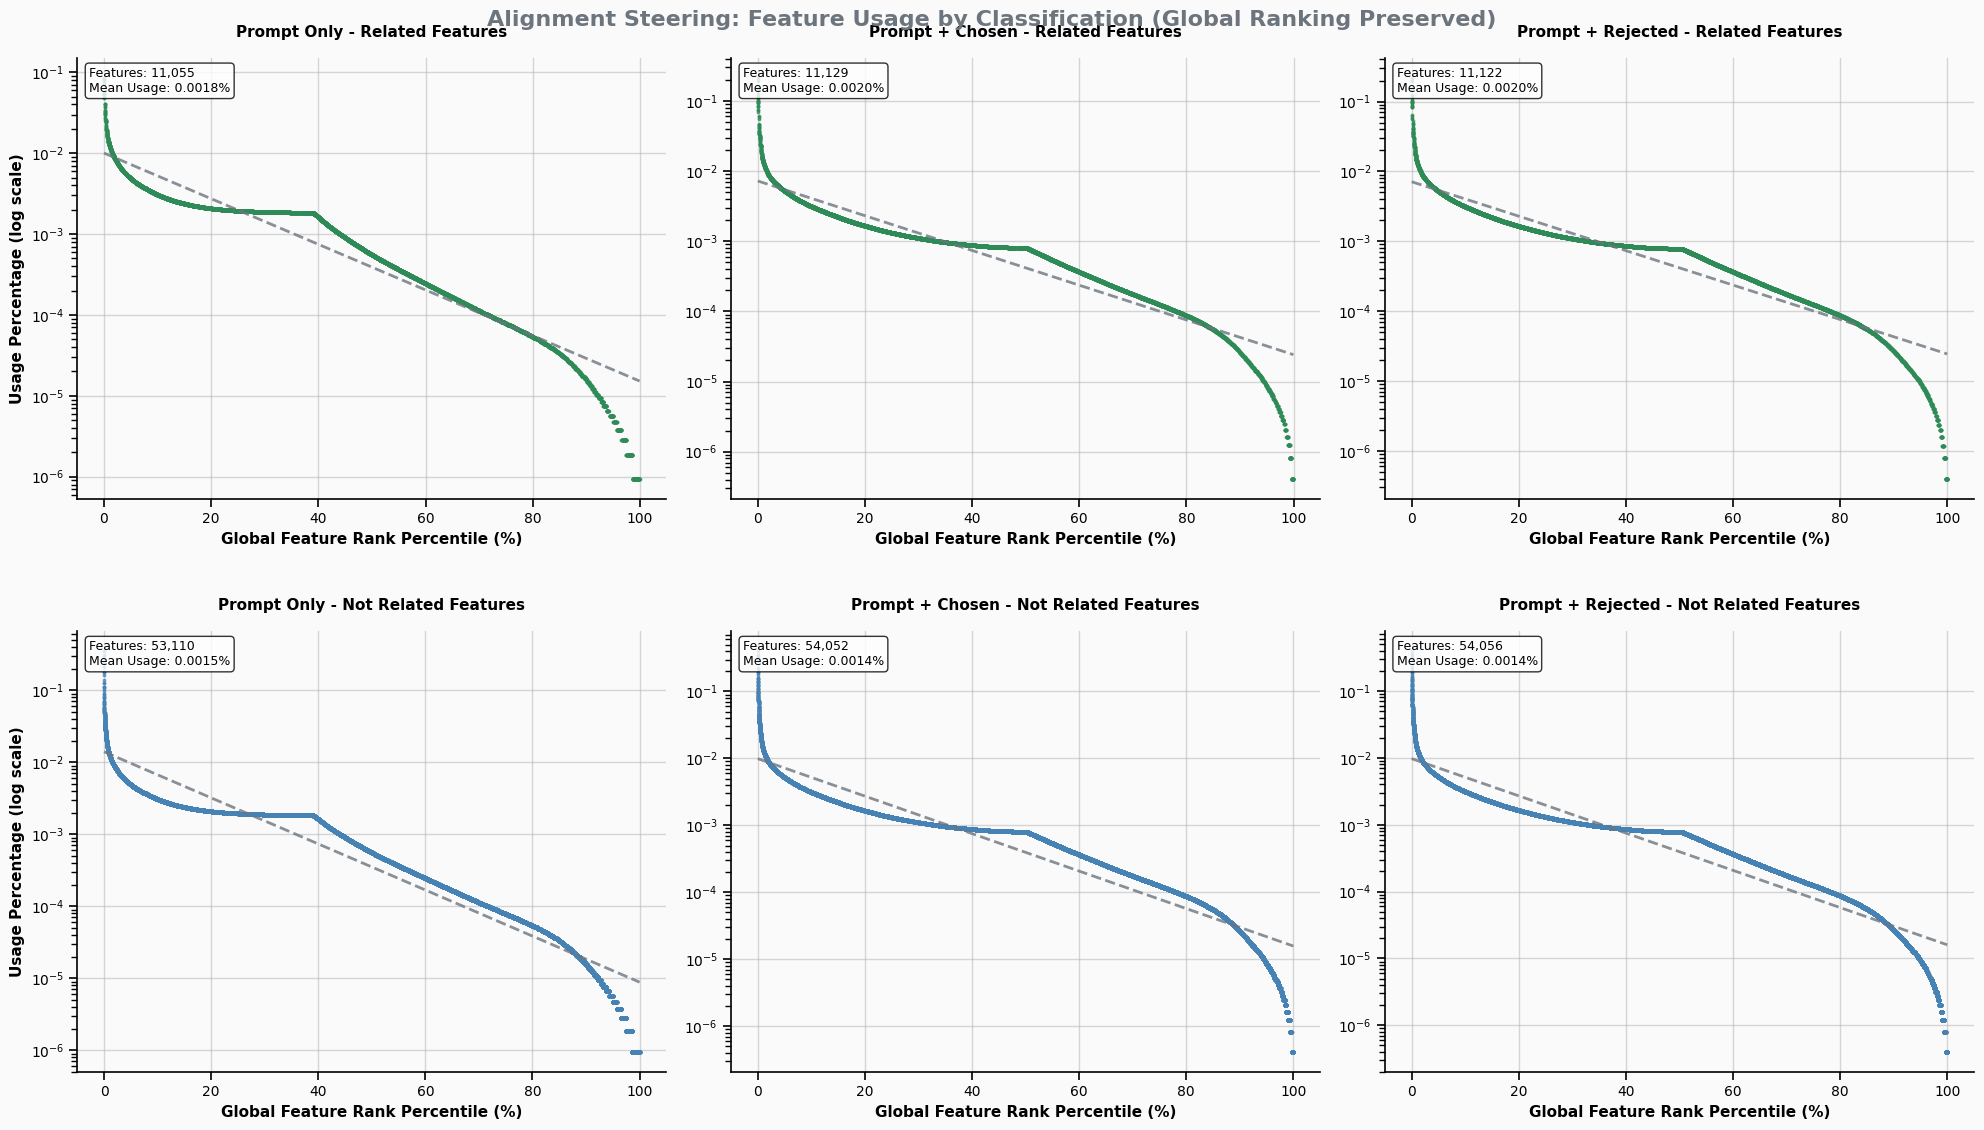

✅ Fixed alignment classification plot created successfully!


In [16]:
# Test the FIXED Alignment Classification Combined Plot
if alignment_usage_data and len(alignment_usage_data) >= 2:
    print("\n" + "="*60)
    print("CREATING FIXED ALIGNMENT CLASSIFICATION COMBINED PLOT")
    print("="*60)
    
    fig_alignment_fixed = create_classification_combined_plot_fixed(
        alignment_usage_data, 
        task_name='Alignment',
        classification_filter='both'
    )
    
    plt.suptitle('Alignment Steering: Feature Usage by Classification (Global Ranking Preserved)', 
                fontsize=16, fontweight='bold', y=0.94, color=colors['neutral'])
    plt.show()
    
    print("✅ Fixed alignment classification plot created successfully!")
else:
    print("⚠️  Need at least 2 response types for alignment classification analysis")


CREATING FIXED STYLE CLASSIFICATION COMBINED PLOT


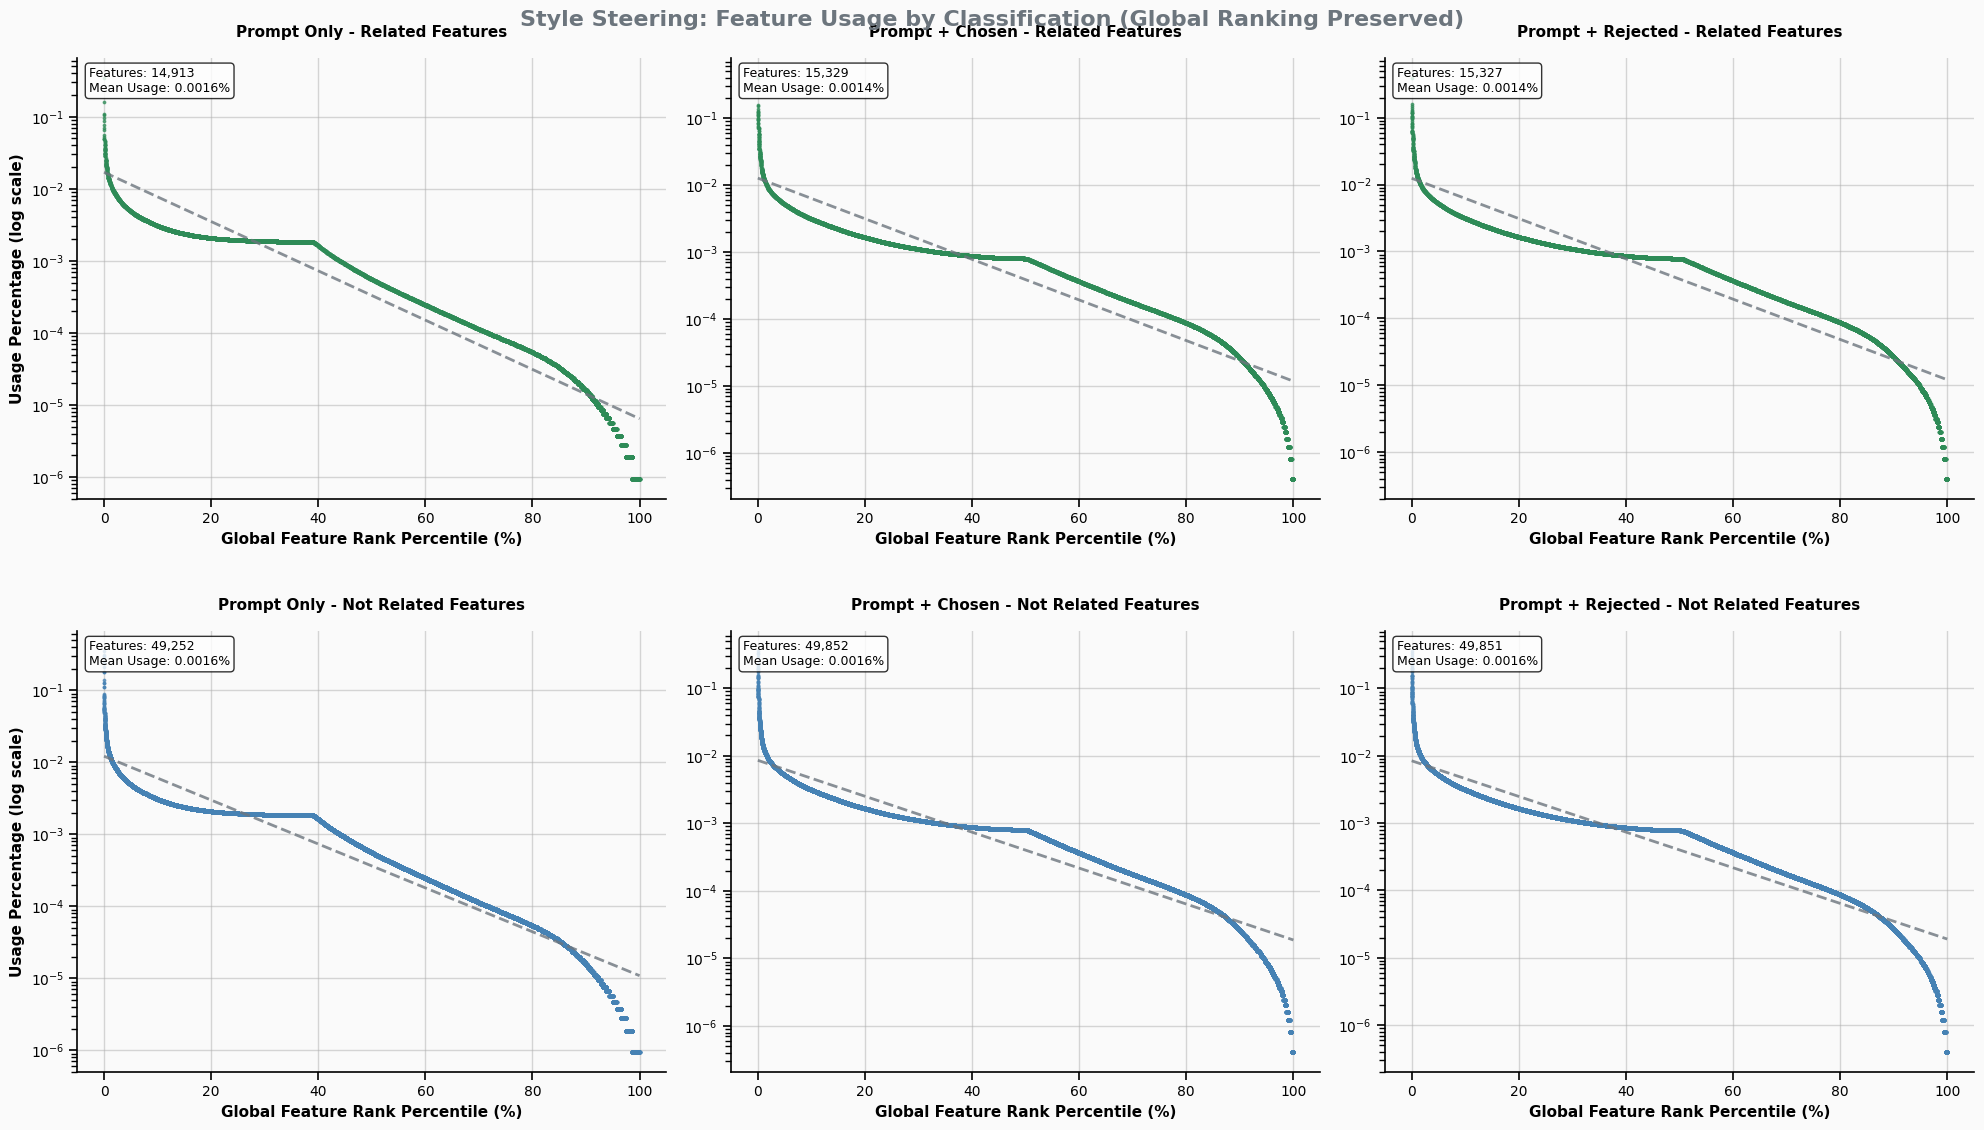

✅ Fixed style classification plot created successfully!


In [17]:
# Test the FIXED Style Classification Combined Plot
if style_usage_data and len(style_usage_data) >= 2:
    print("\n" + "="*60)
    print("CREATING FIXED STYLE CLASSIFICATION COMBINED PLOT")
    print("="*60)
    
    fig_style_fixed = create_classification_combined_plot_fixed(
        style_usage_data, 
        task_name='Style',
        classification_filter='both'
    )
    
    plt.suptitle('Style Steering: Feature Usage by Classification (Global Ranking Preserved)', 
                fontsize=16, fontweight='bold', y=0.94, color=colors['neutral'])
    plt.show()
    
    print("✅ Fixed style classification plot created successfully!")
else:
    print("⚠️  Need at least 2 response types for style classification analysis")

In [18]:
# Comparative Analysis: Alignment vs Style Classification Patterns
if alignment_usage_data and style_usage_data:
    print("\n" + "="*80)
    print("COMPARATIVE ANALYSIS: ALIGNMENT VS STYLE CLASSIFICATION PATTERNS")
    print("="*80)
    
    def analyze_classification_patterns(usage_data_dict, task_name):
        """Analyze patterns in related vs not-related features for a task."""
        results = {}
        
        for response_type, data in usage_data_dict.items():
            usage_df = data['usage_df']
            
            if 'classification' in usage_df.columns:
                related_features = usage_df[usage_df['classification'] == 'related']
                not_related_features = usage_df[usage_df['classification'] == 'not-related']
                unknown_features = usage_df[usage_df['classification'] == 'unknown']
                
                # Calculate usage concentrations
                related_usage = related_features['usage_percentage'].sum()
                not_related_usage = not_related_features['usage_percentage'].sum()
                unknown_usage = unknown_features['usage_percentage'].sum()
                
                # Calculate average usage per feature
                avg_usage_related = related_features['usage_percentage'].mean() if len(related_features) > 0 else 0
                avg_usage_not_related = not_related_features['usage_percentage'].mean() if len(not_related_features) > 0 else 0
                
                # Top feature analysis
                top_100 = usage_df.head(100)
                top_100_related = (top_100['classification'] == 'related').sum()
                top_100_not_related = (top_100['classification'] == 'not-related').sum()
                
                results[response_type] = {
                    'related_count': len(related_features),
                    'not_related_count': len(not_related_features), 
                    'unknown_count': len(unknown_features),
                    'related_usage_total': related_usage,
                    'not_related_usage_total': not_related_usage,
                    'unknown_usage_total': unknown_usage,
                    'avg_usage_related': avg_usage_related,
                    'avg_usage_not_related': avg_usage_not_related,
                    'top_100_related': top_100_related,
                    'top_100_not_related': top_100_not_related
                }
        
        return results
    
    # Analyze both tasks
    alignment_analysis = analyze_classification_patterns(alignment_usage_data, 'Alignment')
    style_analysis = analyze_classification_patterns(style_usage_data, 'Style')
    
    # Print comparative results
    for response_type in ['prompt_only', 'prompt_chosen', 'prompt_rejected']:
        if response_type in alignment_analysis and response_type in style_analysis:
            align_data = alignment_analysis[response_type]
            style_data = style_analysis[response_type]
            
            print(f"\n{format_response_label(response_type)}:")
            print(f"  {'Task':<12} {'Related':<8} {'Not-Rel':<8} {'Unknown':<8} {'Rel Usage':<10} {'Not-Rel Usage':<12} {'Top100 Rel':<10}")
            print(f"  {'-'*80}")
            print(f"  {'Alignment':<12} {align_data['related_count']:<8,} {align_data['not_related_count']:<8,} {align_data['unknown_count']:<8,} "
                  f"{align_data['related_usage_total']:<10.1f}% {align_data['not_related_usage_total']:<12.1f}% {align_data['top_100_related']:<10}")
            print(f"  {'Style':<12} {style_data['related_count']:<8,} {style_data['not_related_count']:<8,} {style_data['unknown_count']:<8,} "
                  f"{style_data['related_usage_total']:<10.1f}% {style_data['not_related_usage_total']:<12.1f}% {style_data['top_100_related']:<10}")
            
            print(f"\n  Average Usage Per Feature:")
            print(f"    Alignment - Related: {align_data['avg_usage_related']:.4f}%, Not-Related: {align_data['avg_usage_not_related']:.4f}%")
            print(f"    Style     - Related: {style_data['avg_usage_related']:.4f}%, Not-Related: {style_data['avg_usage_not_related']:.4f}%")
            
            # Calculate efficiency ratios
            align_efficiency = align_data['avg_usage_related'] / align_data['avg_usage_not_related'] if align_data['avg_usage_not_related'] > 0 else float('inf')
            style_efficiency = style_data['avg_usage_related'] / style_data['avg_usage_not_related'] if style_data['avg_usage_not_related'] > 0 else float('inf')
            
            print(f"    Related/Not-Related Efficiency Ratio:")
            print(f"      Alignment: {align_efficiency:.2f}x")
            print(f"      Style:     {style_efficiency:.2f}x")

else:
    print("⚠️  Need both alignment and style data for comparative analysis")


COMPARATIVE ANALYSIS: ALIGNMENT VS STYLE CLASSIFICATION PATTERNS

Prompt Only:
  Task         Related  Not-Rel  Unknown  Rel Usage  Not-Rel Usage Top100 Rel
  --------------------------------------------------------------------------------
  Alignment    11,143   54,201   192      19.5      % 80.5        % 16        
  Style        15,391   49,953   192      23.4      % 76.6        % 24        

  Average Usage Per Feature:
    Alignment - Related: 0.0017%, Not-Related: 0.0015%
    Style     - Related: 0.0015%, Not-Related: 0.0015%
    Related/Not-Related Efficiency Ratio:
      Alignment: 1.18x
      Style:     0.99x

Prompt + Chosen:
  Task         Related  Not-Rel  Unknown  Rel Usage  Not-Rel Usage Top100 Rel
  --------------------------------------------------------------------------------
  Alignment    11,143   54,201   192      21.9      % 78.1        % 22        
  Style        15,391   49,953   192      21.1      % 78.9        % 29        

  Average Usage Per Feature:
    Al

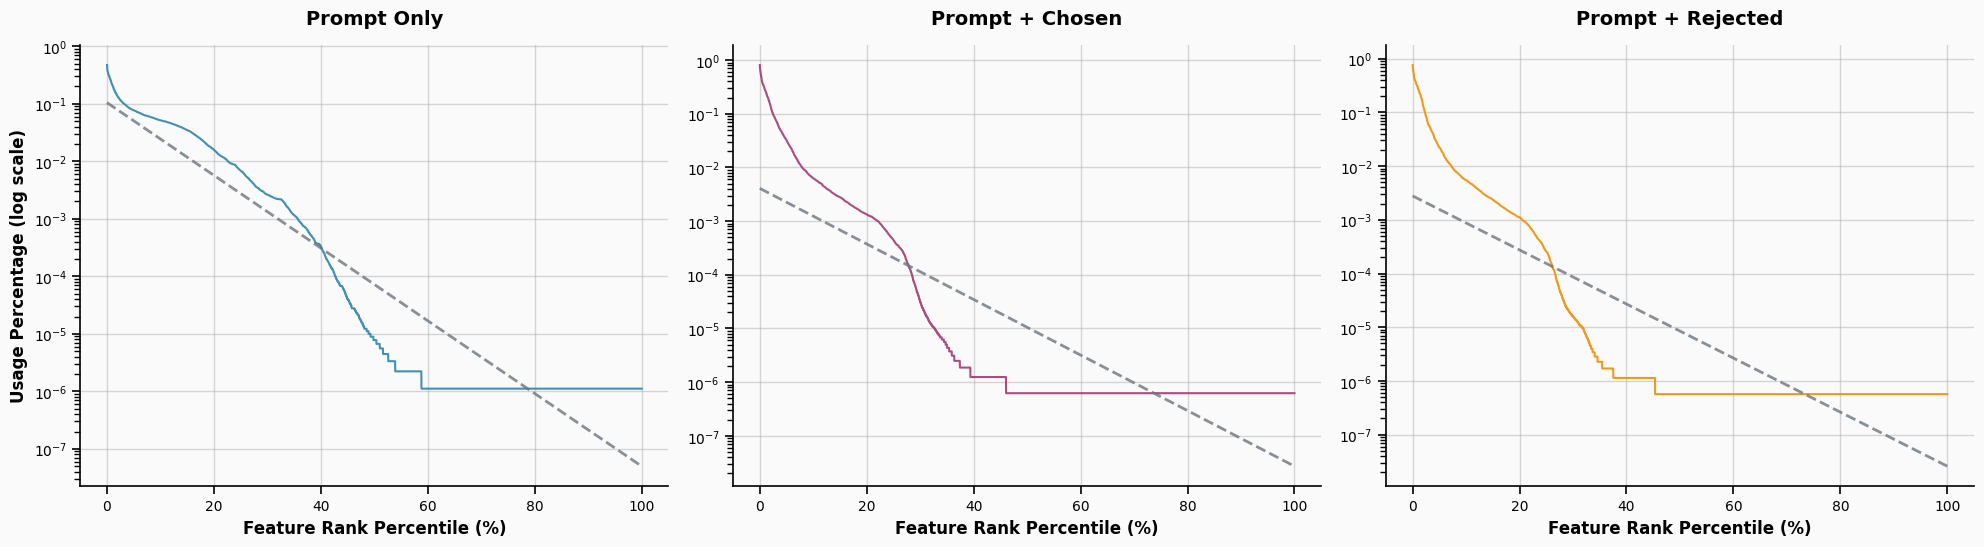


COMPARATIVE ANALYSIS ACROSS RESPONSE TYPES

Prompt Only:
  Total active features: 6,688
  Mean usage per feature: 13427.9
  Exponential decay rate: -0.000945
  Top 1% concentration: 70.5%
  Top 10% concentration: 100.0%
  Gini coefficient (inequality): 0.985
  Related features: 11,143 (13.5% total usage)
  Not-related features: 54,201 (85.0% total usage)

Prompt + Chosen:
  Total active features: 10,801
  Mean usage per feature: 14849.1
  Exponential decay rate: -0.000479
  Top 1% concentration: 91.4%
  Top 10% concentration: 100.0%
  Gini coefficient (inequality): 0.992
  Related features: 11,143 (12.8% total usage)
  Not-related features: 54,201 (85.4% total usage)

Prompt + Rejected:
  Total active features: 11,572
  Mean usage per feature: 15210.3
  Exponential decay rate: -0.000435
  Top 1% concentration: 91.8%
  Top 10% concentration: 100.0%
  Gini coefficient (inequality): 0.993
  Related features: 11,143 (12.5% total usage)
  Not-related features: 54,201 (85.4% total usage)


In [19]:
# Create combined plot showing all three response types side by side
if len(usage_data) >= 2:
    fig_combined = create_combined_distribution_plot(usage_data)
    # plt.suptitle('Feature Usage Distributions Across Response Types', 
    #             fontsize=18, fontweight='bold', y=0.95, color=colors['neutral'])
    plt.show()
    
    # Comparative analysis
    print("\n" + "="*80)
    print("COMPARATIVE ANALYSIS ACROSS RESPONSE TYPES")
    print("="*80)
    
    for response_type, data in usage_data.items():
        usage_df = data['usage_df']
        summary = data['summary']
        
        # Exponential decay analysis - fit slope in semi-log space (linear x, log y)
        x_data = usage_df['rank']
        y_data = usage_df['usage_percentage']  # Already in percentage form
        
        # Create a mask for positive values in y
        positive_mask = y_data > 0
        x_trend = x_data[positive_mask]
        log_y = np.log10(y_data[positive_mask])
        
        if len(x_trend) > 10:
            slope, intercept = np.polyfit(x_trend, log_y, 1)
        else:
            slope = np.nan
        
        print(f"\n{format_response_label(response_type)}:")
        print(f"  Total active features: {summary['active_features']:,}")
        print(f"  Mean usage per feature: {summary['mean_usage_per_active_feature']:.1f}")
        print(f"  Exponential decay rate: {slope:.6f}")
        print(f"  Top 1% concentration: {usage_df.head(int(0.01 * len(usage_df)))['usage_percentage'].sum():.1f}%")
        print(f"  Top 10% concentration: {usage_df.head(int(0.10 * len(usage_df)))['usage_percentage'].sum():.1f}%")
        
        # Gini coefficient calculation for inequality measure
        sorted_usage = np.sort(usage_df['usage_percentage'])
        n = len(sorted_usage)
        gini = (2 * np.sum(np.arange(1, n + 1) * sorted_usage)) / (n * np.sum(sorted_usage)) - (n + 1) / n
        print(f"  Gini coefficient (inequality): {gini:.3f}")
        
        # Related vs not-related feature analysis
        if 'classification' in usage_df.columns:
            related_features = usage_df[usage_df['classification'] == 'related']
            not_related_features = usage_df[usage_df['classification'] == 'not-related']
            
            related_usage = related_features['usage_percentage'].sum()
            not_related_usage = not_related_features['usage_percentage'].sum()
            
            print(f"  Related features: {len(related_features):,} ({related_usage:.1f}% total usage)")
            print(f"  Not-related features: {len(not_related_features):,} ({not_related_usage:.1f}% total usage)")
else:
    print("⚠️  Need at least 2 response types for combined analysis")

## Data Export and Summary

In [20]:
# Export results and plots
if usage_data:
    output_dir = Path("../outputs/feature_classification/analysis")
    output_dir.mkdir(parents=True, exist_ok=True)
    
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    
    # Save individual plots
    plot_counter = 1
    for response_type, data in usage_data.items():
        fig = create_feature_distribution_plot(
            data['usage_df'],
            f'Feature Usage Distribution: {format_response_label(response_type)}',
            response_type,
            show_classification_colors=True
        )
        
        plot_filename_png = output_dir / f'feature_usage_distribution_{response_type}_{timestamp}.png'
        plot_filename_pdf = output_dir / f'feature_usage_distribution_{response_type}_{timestamp}.pdf'
        
        # Save as PNG
        fig.savefig(plot_filename_png, dpi=300, bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        
        # Save as PDF
        fig.savefig(plot_filename_pdf, format='pdf', bbox_inches='tight', 
                   facecolor='white', edgecolor='none')
        
        plt.close(fig)
        
        print(f"Plot {plot_counter} saved: {plot_filename_png.name} & {plot_filename_pdf.name}")
        plot_counter += 1
    
    # Save combined plot
    if len(usage_data) >= 2:
        fig_combined = create_combined_distribution_plot(usage_data)
        plt.suptitle('Feature Usage Distributions Across Response Types', 
                    fontsize=18, fontweight='bold', y=0.95)
        
        combined_filename_png = output_dir / f'feature_usage_distribution_combined_{timestamp}.png'
        combined_filename_pdf = output_dir / f'feature_usage_distribution_combined_{timestamp}.pdf'
        
        # Save as PNG
        fig_combined.savefig(combined_filename_png, dpi=300, bbox_inches='tight', 
                           facecolor='white', edgecolor='none')
        
        # Save as PDF
        fig_combined.savefig(combined_filename_pdf, format='pdf', bbox_inches='tight', 
                           facecolor='white', edgecolor='none')
        
        plt.close(fig_combined)
        
        print(f"Combined plot saved: {combined_filename_png.name} & {combined_filename_pdf.name}")
    
    # Export summary statistics as JSON
    summary_stats = {}
    
    for response_type, data in usage_data.items():
        usage_df = data['usage_df']
        summary = data['summary']
        
        # Calculate exponential decay rate
        x_data = usage_df['rank']
        y_data = usage_df['usage_percentage']  # Already in percentage form
        # Create a mask for positive values in y
        positive_mask = y_data > 0
        x_trend = x_data[positive_mask]
        log_y = np.log10(y_data[positive_mask])
        
        if len(x_trend) > 10:
            slope, intercept = np.polyfit(x_trend, log_y, 1)
        else:
            slope = None
        
        # Calculate Gini coefficient
        sorted_usage = np.sort(usage_df['usage_percentage'])
        n = len(sorted_usage)
        gini = (2 * np.sum(np.arange(1, n + 1) * sorted_usage)) / (n * np.sum(sorted_usage)) - (n + 1) / n
        
        summary_stats[response_type] = {
            'total_features': summary['total_features'],
            'active_features': summary['active_features'],
            'total_usage_events': summary['total_usage_events'],
            'mean_usage_per_feature': summary['mean_usage_per_active_feature'],
            'exponential_decay_rate': float(slope) if slope is not None else None,
            'gini_coefficient': float(gini),
            'top_1_percent_concentration': float(usage_df.head(int(0.01 * len(usage_df)))['usage_percentage'].sum()),
            'top_10_percent_concentration': float(usage_df.head(int(0.10 * len(usage_df)))['usage_percentage'].sum()),
            'max_usage_percentage': float(usage_df['usage_percentage'].max()),
            'min_usage_percentage': float(usage_df['usage_percentage'].min()),
            'classification_breakdown': {
                classification: int(count) 
                for classification, count in usage_df['classification'].value_counts().items()
            } if 'classification' in usage_df.columns else {}
        }
    
    # Save summary statistics
    summary_filename = output_dir / f'feature_usage_distribution_summary_{timestamp}.json'
    with open(summary_filename, 'w') as f:
        json.dump(summary_stats, f, indent=2, sort_keys=True)
    
    print(f"\n💾 EXPORT SUMMARY:")
    print(f"Individual plots: {len(usage_data)} files")
    print(f"Combined plot: {'✅' if len(usage_data) >= 2 else '❌'}")
    print(f"Summary statistics: {summary_filename.name}")
    print(f"Output directory: {output_dir.absolute()}")
    
    print(f"\n🎯 KEY INSIGHTS:")
    for response_type, stats in summary_stats.items():
        print(f"{format_response_label(response_type)}:")
        decay_rate_text = f"{stats['exponential_decay_rate']:.6f}" if stats['exponential_decay_rate'] is not None else 'N/A'
        print(f"  • Exponential decay rate: {decay_rate_text}")
        print(f"  • Inequality (Gini): {stats['gini_coefficient']:.3f}")
        print(f"  • Top 1% features control: {stats['top_1_percent_concentration']:.1f}% of usage")
        print(f"  • Most used feature: {stats['max_usage_percentage']:.3f}% of total usage")

else:
    print("⚠️  No data available for export")

Plot 1 saved: feature_usage_distribution_prompt_only_20251115_161506.png & feature_usage_distribution_prompt_only_20251115_161506.pdf
Plot 2 saved: feature_usage_distribution_prompt_chosen_20251115_161506.png & feature_usage_distribution_prompt_chosen_20251115_161506.pdf
Plot 3 saved: feature_usage_distribution_prompt_rejected_20251115_161506.png & feature_usage_distribution_prompt_rejected_20251115_161506.pdf
Combined plot saved: feature_usage_distribution_combined_20251115_161506.png & feature_usage_distribution_combined_20251115_161506.pdf

💾 EXPORT SUMMARY:
Individual plots: 3 files
Combined plot: ✅
Summary statistics: feature_usage_distribution_summary_20251115_161506.json
Output directory: /lambda/nfs/fsrl/feature-steering-RL/notebooks/../outputs/feature_classification/analysis

🎯 KEY INSIGHTS:
Prompt Only:
  • Exponential decay rate: -0.000945
  • Inequality (Gini): 0.985
  • Top 1% features control: 70.5% of usage
  • Most used feature: 0.471% of total usage
Prompt + Chosen:
  